In [ ]:
!git clone https://github.com/deepanrajm/machine_learning.git

Cloning into 'machine_learning'...
remote: Enumerating objects: 73082, done.
remote: Counting objects: 100% (3052/3052), done.
remote: Compressing objects: 100% (2855/2855), done.
remote: Total 73082 (delta 209), reused 3029 (delta 190), pack-reused 70030
Receiving objects: 100% (73082/73082), 126.34 MiB | 22.96 MiB/s, done.
Resolving deltas: 100% (211/211), done.
Updating files: 100% (5867/5867), done.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
dataframe = read_csv("machine_learning/Classification/mobile_cleaned.csv")
dataframe.info()
print(dataframe.head())
# Get the correlation of each feature with the target variable
corr_with_target = dataframe.corr()['is_liked']

# Print column names with correlation above 0.10
print("Columns with correlation above 0.10 with 'is_liked':")
for column_name, correlation_value in corr_with_target.items():
    if correlation_value > 0.10:
        print(f"Column '{column_name}' has correlation {correlation_value:.2f}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   sim_type                           109 non-null    int64  
 1   aperture                           109 non-null    int64  
 2   gpu_rank                           109 non-null    int64  
 3   weight                             109 non-null    float64
 4   stand_by_time                      109 non-null    int64  
 5   processor_frequency                109 non-null    float64
 6   thickness                          109 non-null    float64
 7   flash_type                         109 non-null    int64  
 8   front_camera_resolution            109 non-null    float64
 9   auto_focus                         109 non-null    int64  
 10  screen_size                        109 non-null    float64
 11  frames_per_second                  109 non-null    int64  

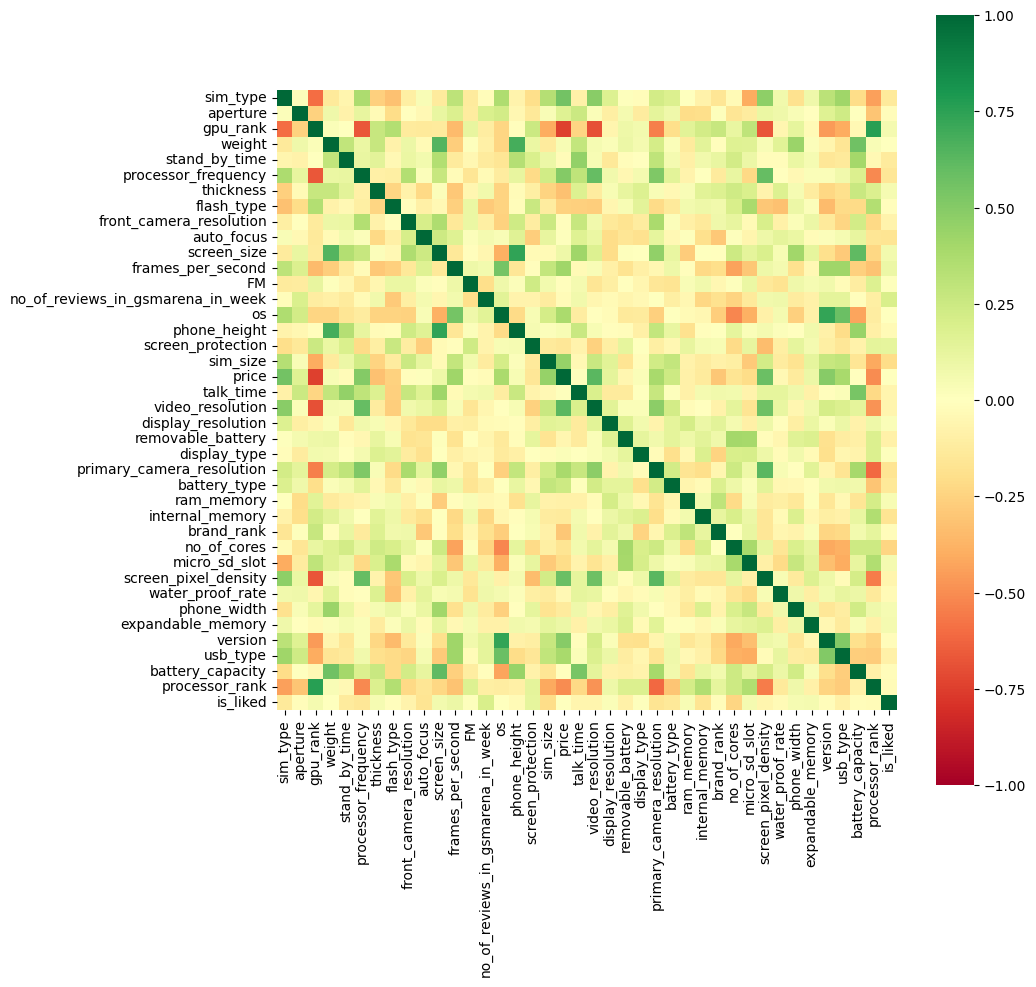

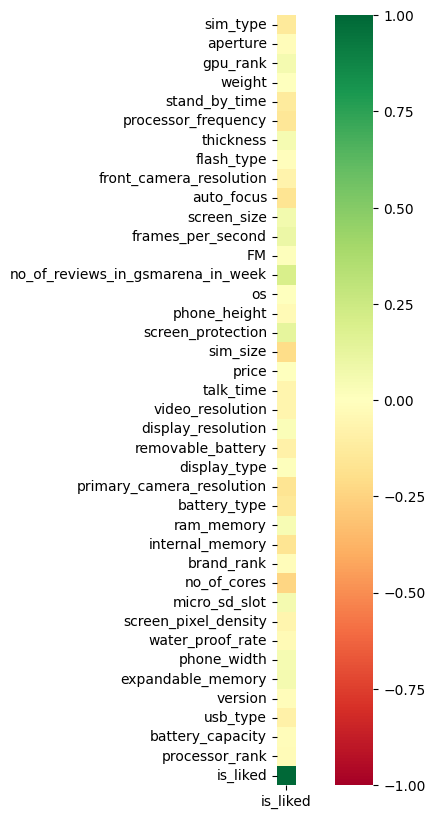

In [ ]:
correlation_full_health = dataframe.corr()
plt.figure(figsize = (10,10))
axis_corr = sns.heatmap(correlation_full_health,vmin=-1, vmax=1, center=0,cmap='RdYlGn',square=True)
plt.show()
corr_matrix = dataframe.corr()['is_liked']

plt.figure(figsize = (10,10))
axis_corr = sns.heatmap(corr_matrix.to_frame(),vmin=-1, vmax=1, center=0,cmap='RdYlGn',square=True)
plt.show()

In [ ]:
for column_name, correlation_value in corr_matrix.items():
    if abs(correlation_value) > 0.10:
        print(f"Column '{column_name}' has correlation {correlation_value}")
    elif abs(correlation_value) < 0.10:
        # print(column_name)
        dataframe = dataframe.drop([column_name], axis=1)
print(dataframe.info())

Column 'sim_type' has correlation -0.13789208006276027
Column 'stand_by_time' has correlation -0.12867878856318302
Column 'processor_frequency' has correlation -0.14924225468356805
Column 'auto_focus' has correlation -0.16938363140886795
Column 'no_of_reviews_in_gsmarena_in_week' has correlation 0.1960286255839871
Column 'screen_protection' has correlation 0.13190112752430114
Column 'sim_size' has correlation -0.20946686410370102
Column 'primary_camera_resolution' has correlation -0.17033578972104957
Column 'battery_type' has correlation -0.1458213794850549
Column 'internal_memory' has correlation -0.16445698727489788
Column 'no_of_cores' has correlation -0.23766069249175514
Column 'is_liked' has correlation 1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   sim_type                           109 n

In [ ]:
dataset = dataframe.values
data = dataset[1:,0:11]
labels = dataset[1:,11]
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data),
	np.array(labels), test_size=0.25, random_state=42)

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#penality = l1,l2, elasticnet
solver = ["liblinear", "sag", "saga", "lbfgs", "newton-cg",]
#max-iter = 100
# for i in range(50,100):
for x in solver:
  try:
      if x == "liblinear":
        lib = ['l1', 'l2']
        for p in lib:
          model = LogisticRegression(penalty=p , max_iter=100 ,solver = x)
          model.fit(trainData, trainLabels)
          # if model.score(trainData, trainLabels) >= 0.80 and model.score(testData, testLabels) >= 0.80:
          print(model.score(trainData, trainLabels),x)
          print(model.score(testData, testLabels))
          predictions = model.predict(testData)
          print(classification_report(testLabels, predictions))
      elif x == "saga":
        saga = ['l1', 'l2']
        for p in saga:
          model = LogisticRegression(penalty=p , max_iter=100 ,solver = x)
          model.fit(trainData, trainLabels)
          # if model.score(trainData, trainLabels) >= 0.80 and model.score(testData, testLabels) >= 0.80:
          print(model.score(trainData, trainLabels),x)
          print(model.score(testData, testLabels))
          predictions = model.predict(testData)
          print(classification_report(testLabels, predictions))
      else:
          model = LogisticRegression(max_iter=100 ,solver = x)
          model.fit(trainData, trainLabels)
          # if model.score(trainData, trainLabels) >= 0.80 and model.score(testData, testLabels) >= 0.80:
          print(model.score(trainData, trainLabels),x)
          print(model.score(testData, testLabels))
          predictions = model.predict(testData)
          print(classification_report(testLabels, predictions))
  except ConvergenceWarning:
    pass
warnings.resetwarnings()

0.8641975308641975 liblinear
0.7407407407407407
              precision    recall  f1-score   support

         0.0       0.33      0.40      0.36         5
         1.0       0.86      0.82      0.84        22

    accuracy                           0.74        27
   macro avg       0.60      0.61      0.60        27
weighted avg       0.76      0.74      0.75        27

0.8765432098765432 liblinear
0.7407407407407407
              precision    recall  f1-score   support

         0.0       0.33      0.40      0.36         5
         1.0       0.86      0.82      0.84        22

    accuracy                           0.74        27
   macro avg       0.60      0.61      0.60        27
weighted avg       0.76      0.74      0.75        27

0.8518518518518519 sag
0.8148148148148148
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.81      1.00      0.90        22

    accuracy                           0.81 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif